# Import Module

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt

# Load data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/elvanselvano/purwadhika-final-project/main/dataset/DC_Properties.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df['date'] = pd.to_datetime(df['SALEDATE'])
df['SALEYEAR'] = pd.DatetimeIndex(df['date']).year
df.drop('date',axis=1,inplace=True)

In [5]:
df.isnull().sum()

BATHRM                     0
HF_BATHRM                  0
HEAT                       0
AC                         0
NUM_UNITS              52261
ROOMS                      0
BEDRM                      0
AYB                      271
YR_RMDL                78029
EYB                        0
STORIES                52305
SALEDATE               26770
PRICE                  60741
QUALIFIED                  0
SALE_NUM                   0
GBA                    52261
BLDG_NUM                   0
STYLE                  52261
STRUCT                 52261
GRADE                  52261
CNDTN                  52261
EXTWALL                52261
ROOF                   52261
INTWALL                52261
KITCHENS               52262
FIREPLACES                 0
USECODE                    0
LANDAREA                   0
GIS_LAST_MOD_DTTM          0
SOURCE                     0
CMPLX_NUM             106696
LIVING_GBA            106696
FULLADDRESS            52917
CITY                   52906
STATE         

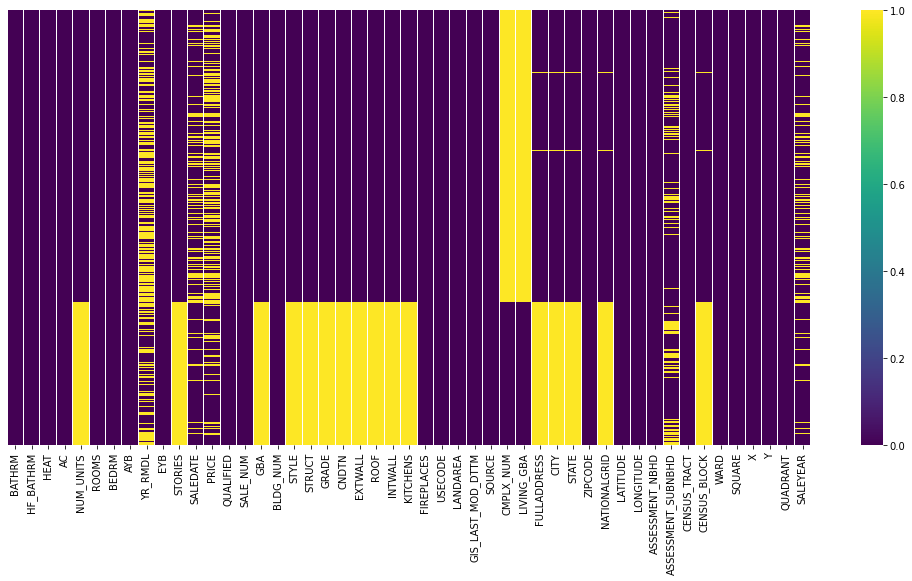

In [16]:
fig, ax = plt.subplots(figsize=(18,8))
sns.heatmap(df.isnull(), yticklabels=False,cmap='viridis')
plt.show()

## Creating is_missing

In [7]:
df2 = df.copy()
for i in df.columns:
  df2['is_missing_'+i] = df[i].isnull()

In [8]:
df2

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,...,is_missing_EYB,is_missing_STORIES,is_missing_SALEDATE,is_missing_PRICE,is_missing_QUALIFIED,is_missing_SALE_NUM,is_missing_GBA,is_missing_BLDG_NUM,is_missing_STYLE,is_missing_STRUCT,is_missing_GRADE,is_missing_CNDTN,is_missing_EXTWALL,is_missing_ROOF,is_missing_INTWALL,is_missing_KITCHENS,is_missing_FIREPLACES,is_missing_USECODE,is_missing_LANDAREA,is_missing_GIS_LAST_MOD_DTTM,is_missing_SOURCE,is_missing_CMPLX_NUM,is_missing_LIVING_GBA,is_missing_FULLADDRESS,is_missing_CITY,is_missing_STATE,is_missing_ZIPCODE,is_missing_NATIONALGRID,is_missing_LATITUDE,is_missing_LONGITUDE,is_missing_ASSESSMENT_NBHD,is_missing_ASSESSMENT_SUBNBHD,is_missing_CENSUS_TRACT,is_missing_CENSUS_BLOCK,is_missing_WARD,is_missing_SQUARE,is_missing_X,is_missing_Y,is_missing_QUADRANT,is_missing_SALEYEAR
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,3.0,2003-11-25 00:00:00,1095000.0,Q,1,2522.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,2.0,5,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23061 09289,38.914680,-77.040832,Old City 2,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,3.0,2000-08-17 00:00:00,NaN,U,1,2567.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1746 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23067 09289,38.914683,-77.040764,Old City 2,...,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,3.0,2016-06-21 00:00:00,2100000.0,Q,3,2522.0,1,3 Story,Row Inside,Very Good,Very Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23074 09289,38.914684,-77.040678,Old City 2,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,3.0,2006-07-12 00:00:00,1602000.0,Q,1,2484.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,3,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23078 09288,38.914683,-77.040629,Old City 2,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,3.0,NaN,NaN,U,1,5255.0,1,3 Story,Semi-Detached,Very Good,Good,Common Brick,Neopren,Hardwood,1.0,0,13,2032,2018-07-22 18:01:43,Residential,NaN,NaN,1804 NEW HAMPSHIRE AVENUE NW,WASHINGTON,DC,20009.0,18S UJ 23188 09253,38.914383,-77.039361,Old City 2,...,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

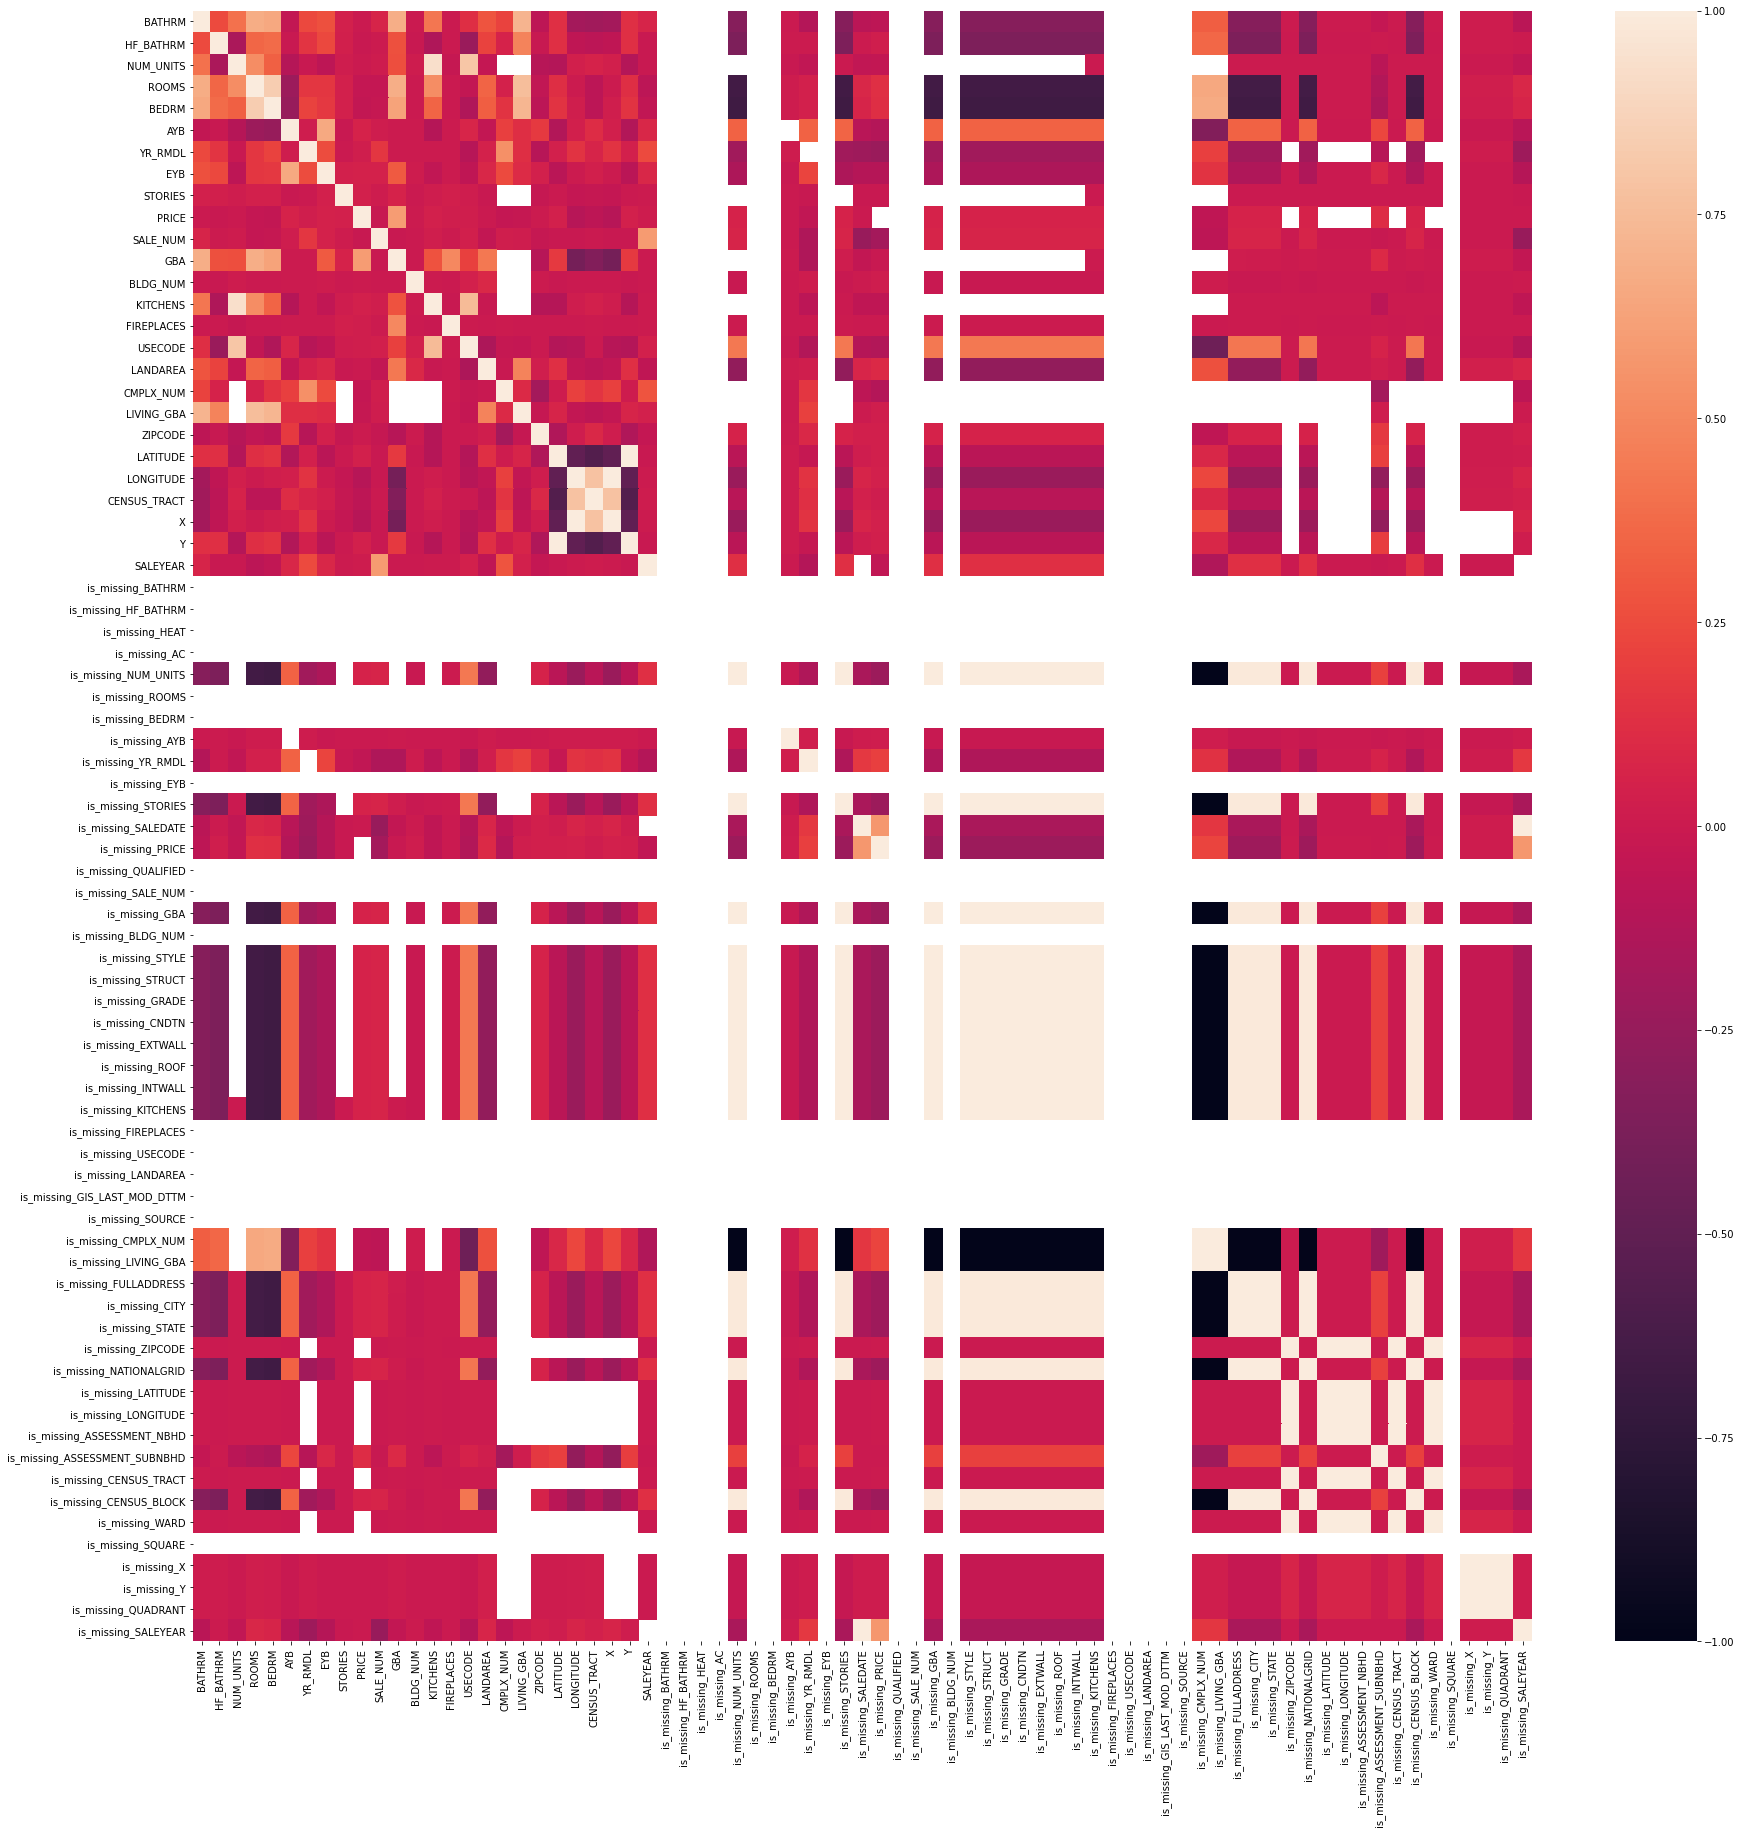

In [9]:
plt.figure(figsize=(30,30))
sns.heatmap(df2.corr(), annot=False, cmap='rocket')
plt.show()

In [10]:
corrmat = df2.corr()
cols = corrmat.nlargest(11,'PRICE')['PRICE'].index
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features from is_missing vs Price']
most_corr

,Most Correlated Features from is_missing vs Price
0,PRICE
1,GBA
2,is_missing_ASSESSMENT_SUBNBHD
3,is_missing_NUM_UNITS
4,is_missing_GBA
5,is_missing_STYLE
6,is_missing_STRUCT
7,is_missing_GRADE
8,is_missing_CNDTN
9,is_missing_EXTWALL


In [11]:
# Returns correlation matrix
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    return xFiltered

# flattens correlation matrix with bounds
def corrFilterFlattened(x: pd.DataFrame, bound: float):
    xFiltered = corrFilter(x, bound)
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

# Returns correlation for a variable from flattened correlation matrix
def filterForLabels(df: pd.DataFrame, label):  
    try:
        sideLeft = df[label,]
    except:
        sideLeft = pd.DataFrame()

    try:
        sideRight = df[:,label]
    except:
        sideRight = pd.DataFrame()

    if sideLeft.empty and sideRight.empty:
        return pd.DataFrame()
    elif sideLeft.empty:        
        concat = sideRight.to_frame()
        concat.rename(columns={0:'Corr'},inplace=True)
        return concat
    elif sideRight.empty:
        concat = sideLeft.to_frame()
        concat.rename(columns={0:'Corr'},inplace=True)
        return concat
    else:
        concat = pd.concat([sideLeft,sideRight], axis=1)
        concat["Corr"] = concat[0].fillna(0) + concat[1].fillna(0)
        concat.drop(columns=[0,1], inplace=True)
        return concat

In [12]:
corrFilterFlattened(df2,.5)

is_missing_CMPLX_NUM     is_missing_NUM_UNITS      -1.000000
                         is_missing_KITCHENS       -0.999986
                         is_missing_STORIES        -0.999373
is_missing_LIVING_GBA    is_missing_CENSUS_BLOCK   -0.990877
is_missing_CMPLX_NUM     is_missing_FULLADDRESS    -0.990723
is_missing_ROOF          BEDRM                     -0.668764
is_missing_KITCHENS      BEDRM                     -0.668758
is_missing_STORIES       BEDRM                     -0.668091
BEDRM                    is_missing_NATIONALGRID   -0.662228
is_missing_FULLADDRESS   BEDRM                     -0.661703
ROOMS                    is_missing_STRUCT         -0.651943
is_missing_KITCHENS      ROOMS                     -0.651941
is_missing_STORIES       ROOMS                     -0.651211
ROOMS                    is_missing_STATE          -0.645458
                         is_missing_FULLADDRESS    -0.644960
CENSUS_TRACT             Y                         -0.563861
                        

In [13]:
filterForLabels(df2,.5)

""


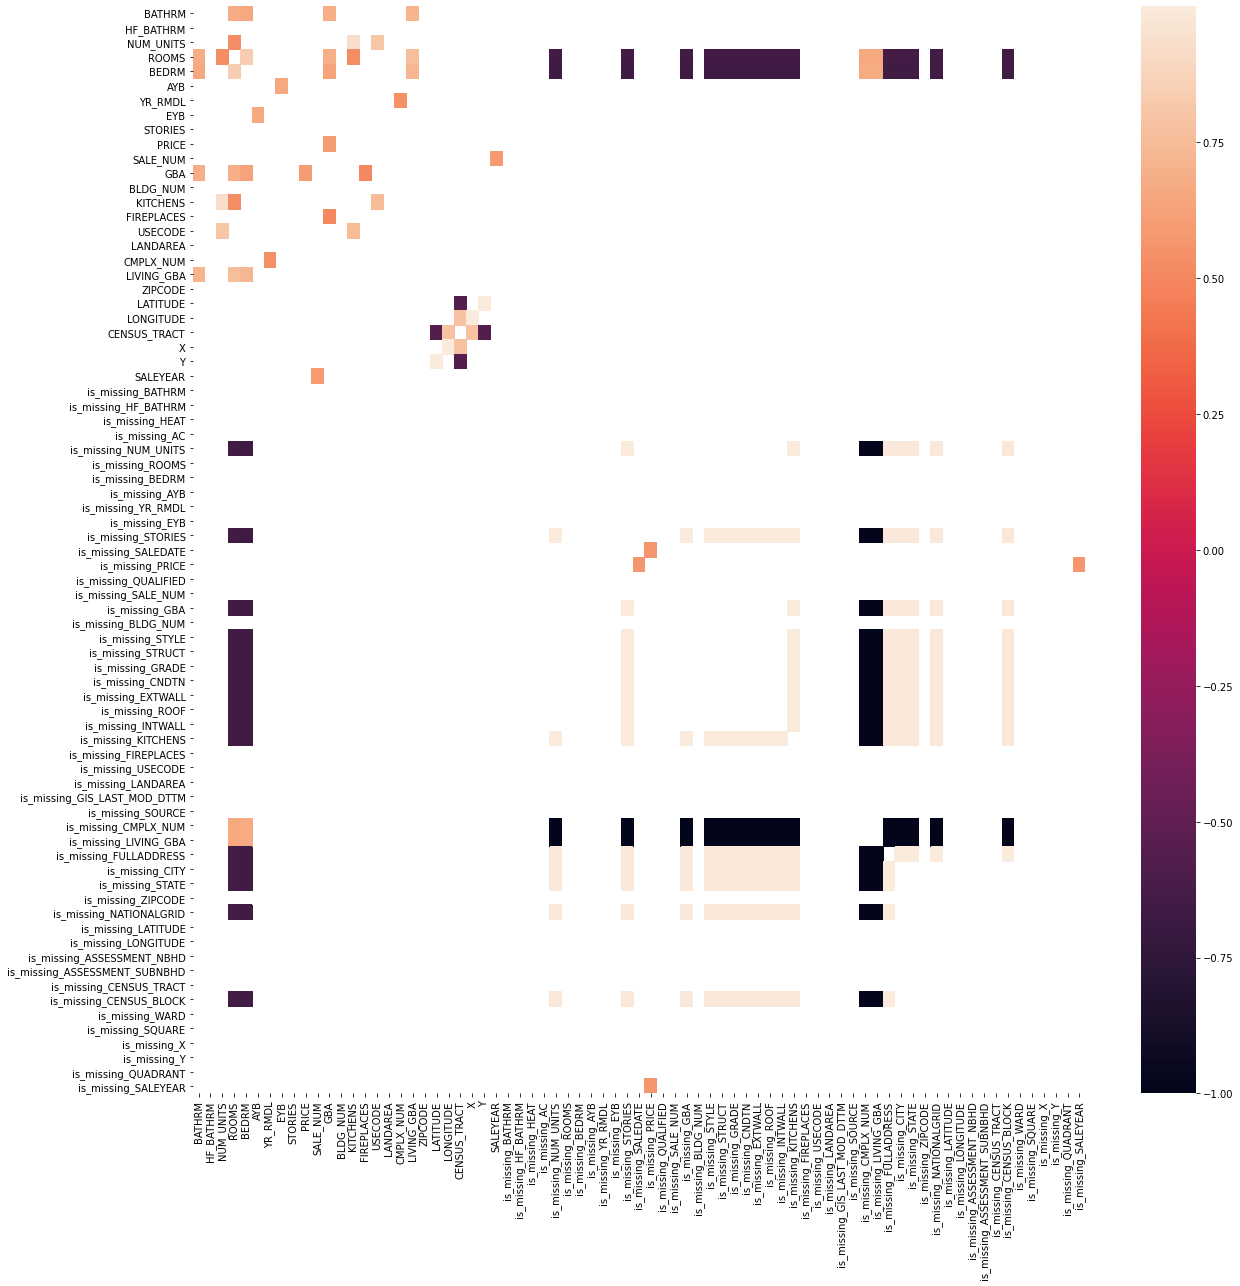

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(corrFilter(df2,.5))

## Condo Check

In [42]:
df_condo = df[df['SOURCE']=='Condominium']

In [43]:
df_condo.shape

(52261, 49)

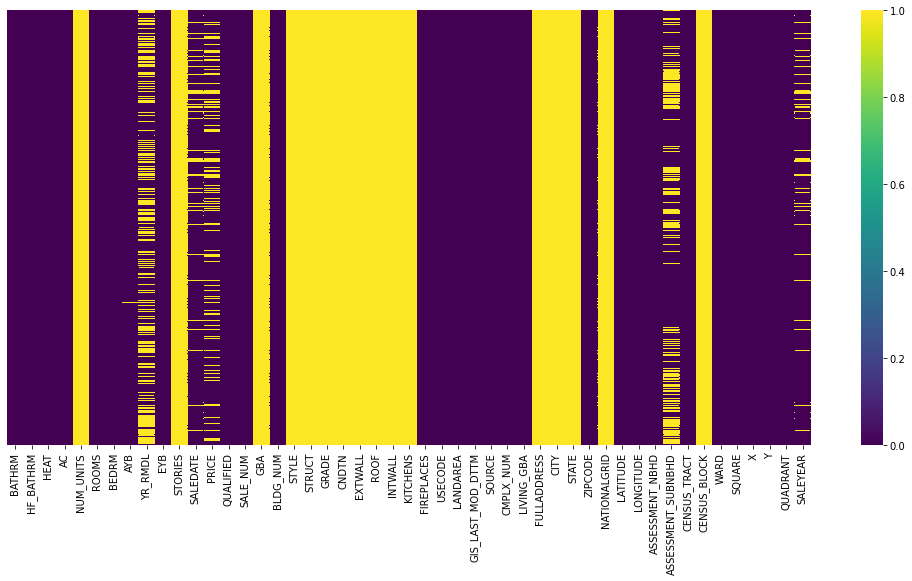

In [41]:
fig, ax = plt.subplots(figsize=(18,8))
sns.heatmap(df_condo.isnull(), yticklabels=False,cmap='viridis')
plt.show()

## Residential Check


In [120]:
df_res = df[df['SOURCE']=='Residential']

In [44]:
df_res.shape

(106696, 49)

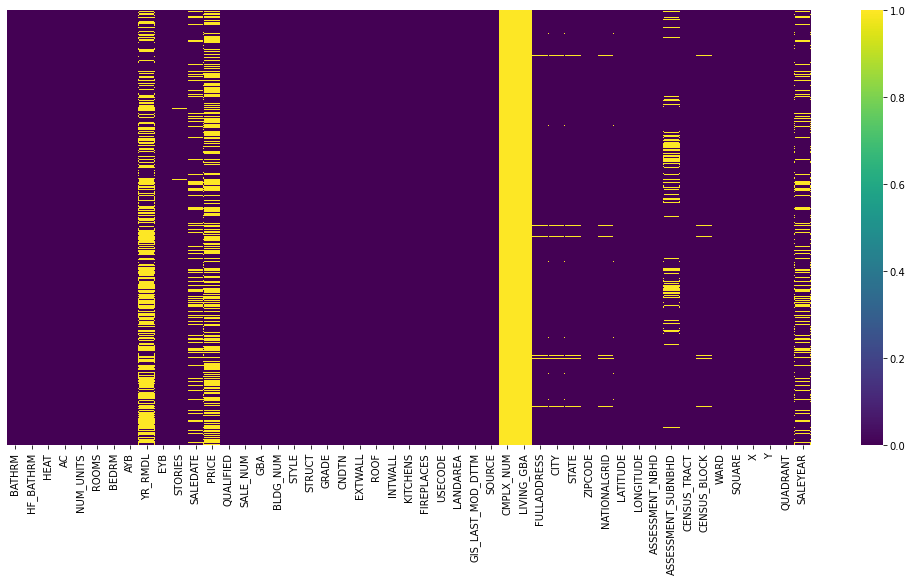

In [38]:
fig, ax = plt.subplots(figsize=(18,8))
sns.heatmap(df_res.isnull(), yticklabels=False,cmap='viridis')
plt.show()

Setelah diamati, DC Properties terdiri dari 2 dataset yang berbeda, yaitu DC Residential dan DC Condominium. Sedangkan kedua dataset tersebut memiliki fitur yang berbeda. Oleh karena itu, ketika digabungkan terdapat perbedaan yang dapat dilihat pada kolom 'Source'

In [50]:
df_res.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM',
       'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE', 'QUALIFIED',
       'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN',
       'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE',
       'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM', 'LIVING_GBA',
       'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID', 'LATITUDE',
       'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT',
       'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT', 'SALEYEAR'],
      dtype='object')

In [51]:
df_res.drop(['CMPLX_NUM','LIVING_GBA'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [118]:
df_res2=df_res[df_res['PRICE'].isnull()==False]
df_res2.shape

(57900, 44)

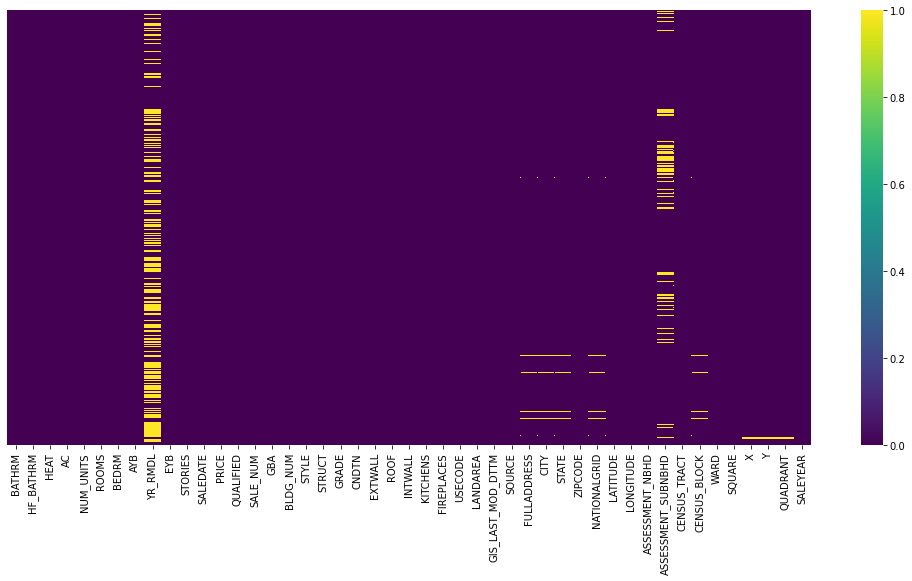

In [65]:
fig, ax = plt.subplots(figsize=(18,8))
sns.heatmap(df_res2.isnull(), yticklabels=False,cmap='viridis')
plt.show()

In [68]:
df_miss_address = df_res2[df_res2.CITY.isnull() == True]

In [69]:
df_miss_address.WARD.value_counts()

Ward 7    160
Ward 3     52
Ward 4     39
Ward 5     36
Ward 6     18
Ward 8     14
Ward 2      9
Ward 1      3
Name: WARD, dtype: int64

# Cramer Correlation Matrix

In [121]:
df_res.drop(['SALEDATE','X','Y','GIS_LAST_MOD_DTTM'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [122]:
cat = []
num = []
for i in df_res.columns:
  if df[i].dtypes == object:
    cat.append(i)
  else:
    num.append(i)

In [135]:
df_res

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,SOURCE,CMPLX_NUM,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT,SALEYEAR
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,3.0,1095000.0,Q,1,2522.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,2.0,5,24,1680,Residential,NaN,NaN,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23061 09289,38.914680,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,2003.0
1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,3.0,NaN,U,1,2567.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,Residential,NaN,NaN,1746 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23067 09289,38.914683,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,2000.0
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,3.0,2100000.0,Q,3,2522.0,1,3 Story,Row Inside,Very Good,Very Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,Residential,NaN,NaN,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23074 09289,38.914684,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,2016.0
3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,3.0,1602000.0,Q,1,2484.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,3,24,1680,Residential,NaN,NaN,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23078 09288,38.914683,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,2006.0
4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,3.0,NaN,U,1,5255.0,1,3 Story,Semi-Detached,Very Good,Good,Common Brick,Neopren,Hardwood,1.0,0,13,2032,Residential,NaN,NaN,1804 NEW HAMPSHIRE AVENUE NW,WASHINGTON,DC,20009.0,18S UJ 23188 09253,38.914383,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106691,2,0,Forced Air,N,2.0,8,4,1953.0,NaN,1962,2.0,NaN,U,1,1600.0,1,2 Story,Multi,Average,Average,Common Brick,Built Up,Hardwood,2.0,0,23,6337,Residential,NaN,NaN,123 JOLIET STREET SW,WASHINGTON,DC,20032.0,18S UH 25829 98897,38.821651,-77.006283,Congress Heights,016 A Congress Heights,10900.0,010900 2000,Ward 8,6254,SW,NaN
106692,2,0,Forced Air,N,2.0,10,5,1953.0,NaN,1962,2.0,100000.0,U,1,1600.0,1,2 Story,Multi,Average,Average,Common Brick,Built Up,Hardwood,2.0,0,23,5348,Residential,NaN,NaN,127 JOLIET STREET SW,WASHINGTON,DC,20032.0,18S UH 25818 98885,38.821534,-77.006407,Congress Heights,016 A Congress Heights,10900.0,010900 2000,Ward 8,6254,SW,2012.0
106693,2,0,Forced Air,N,2.0,10,4,1953.0,NaN,1953,2.0,NaN,U,1,1600.0,1,2 Story,Multi,Average,Average,Common Brick,Built Up,Hardwood,2.0,0,23,3466,Residential,NaN,NaN,131 JOLIET STREET SW,WASHINGTON,DC,20032.0,18S UH 25815 98879,38.821481,-77.006446,Congress Heights,016 A Congress Heights,10900.0,010900 2000,Ward 8,6254,SW,2009.0
106694,2,0,Forced Air,N,2.0,10,4,1953.0,2017.0,1971,2.0,215000.0,U,4,1600.0,1,2 Story,Multi,Average,Good,Common Brick,Comp Shingle,Hardwood,2.0,0,23,3046,Residential,NaN,NaN,135 JOLIET STREET SW,WASHINGTON,DC,20032.0,18S UH 25807 98865,38.821356,-77.006528,Congress Heights,016 A Congress Heights,10900.0,010900 2000,Ward 8,6254,SW,2017.0


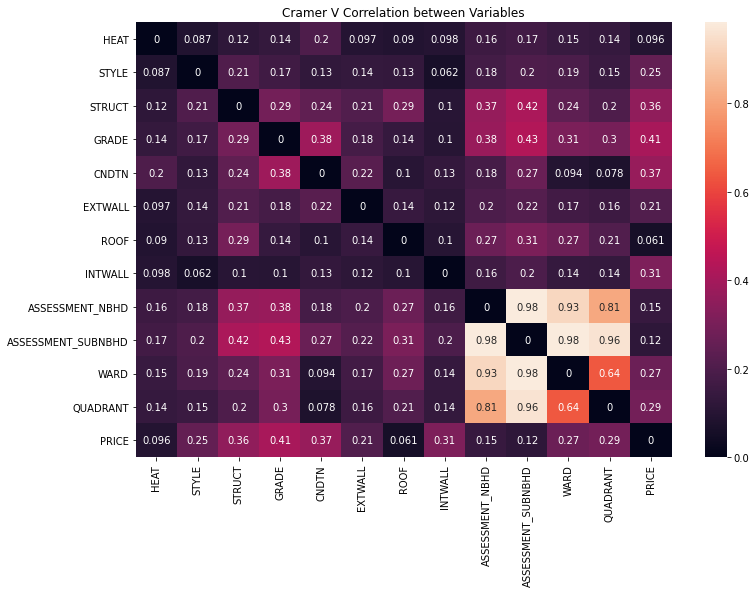

In [140]:
from itertools import combinations
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorical-categorical association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

cols = ['HEAT','STYLE','STRUCT', 'GRADE', 'CNDTN', 'EXTWALL','ROOF', 'INTWALL','ASSESSMENT_NBHD','ASSESSMENT_SUBNBHD','WARD','QUADRANT','PRICE']
# fitur kategorikal yang diambil yang sekiranya dapat di korelasikan dengan 'Price', kategori geographical yang diambil hanya yang mempunyai distinct data yg kecil
corrM = np.zeros((len(cols),len(cols)))
# there's probably a nice pandas way to do this
for col1, col2 in combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(df_res2[col1], df_res2[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables");


# Outliers Check

In [144]:
df_res2.sort_values('PRICE',ascending=False).head(5)

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT,SALEYEAR
97155,4,0,Forced Air,Y,0.0,5,0,2002.0,NaN,2007,1.00,25100000.0,U,2,4184.0,1,1 Story,Multi,Above Average,Very Good,Vinyl Siding,Comp Shingle,Hardwood/Carp,1.0,0,19,63109,2018-07-22 18:01:43,Residential,2327 GOOD HOPE COURT SE,WASHINGTON,DC,20020.0,18S UJ 28907 03329,38.862163,-76.971950,Randle Heights,043 B Randle Heights,7502.0,007502 1000,Ward 8,5735,SE,2018.0
104206,0,0,No Data,0,0.0,0,0,2004.0,NaN,2004,0.00,25000000.0,U,4,2000.0,1,1 Story,Default,No Data,Default,Default,Typical,Default,0.0,0,19,21017,2018-07-22 18:01:43,Residential,4242 7TH STREET SE,WASHINGTON,DC,20032.0,18S UH 26720 99647,38.828575,-76.996221,Congress Heights,016 C Congress Heights,9811.0,009811 2001,Ward 8,6208,SE,2018.0
20164,7,3,Ht Pump,Y,2.0,31,12,1805.0,2004.0,2000,2.75,23960287.0,U,1,14966.0,1,3 Story,Row End,Exceptional-C,Very Good,Common Brick,Slate,Hardwood,4.0,6,24,68880,2018-07-22 18:01:43,Residential,3124 Q STREET NW,WASHINGTON,DC,20007.0,18S UJ 21133 08833,38.910188,-77.062936,Georgetown,025 F Georgetown,100.0,000100 3003,Ward 2,1270,NW,2007.0
20685,6,5,Warm Cool,Y,1.0,17,9,1801.0,2013.0,1986,2.50,22000000.0,Q,1,10110.0,1,2.5 Story Fin,Single,Exceptional-C,Good,Common Brick,Slate,Hardwood,2.0,4,12,155905,2018-07-22 18:01:43,Residential,1623 28TH STREET NW,WASHINGTON,DC,20007.0,18S UJ 21685 08985,38.911670,-77.056612,Georgetown,025 H Georgetown,100.0,000100 1000,Ward 2,1285,NW,2011.0
34527,9,5,Forced Air,Y,2.0,25,7,1994.0,NaN,2012,2.50,18000000.0,Q,5,15673.0,1,2.5 Story Fin,Single,Exceptional-D,Excellent,Common Brick,Slate,Hardwood,2.0,5,12,35240,2018-07-22 18:01:43,Residential,3107 FESSENDEN STREET NW,WASHINGTON,DC,20008.0,18S UJ 21109 13760,38.954550,-77.064497,Forest Hills,NaN,1301.0,001301 2008,Ward 3,2277,NW,2015.0


In [152]:
df_res2.QUALIFIED.value_counts()

Q    45886
U    12014
Name: QUALIFIED, dtype: int64

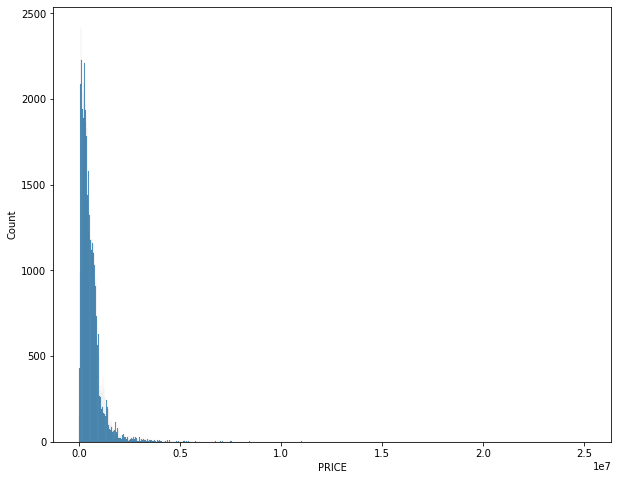

In [143]:
plt.figure(figsize=(10,8))
sns.histplot(df_res2['PRICE'])
plt.show()

In [163]:
#Removing Outliers with Median Absolute Deviation for non normaly distributed dataset
from scipy.stats import norm
def mad_based_outlier(points, thresh=3.5):
    if type(points) is list:
        points = np.asarray(points)
    if len(points.shape) == 1:
        points = points[:, None]
    med = np.median(points, axis=0)
    abs_dev = np.absolute(points - med)
    med_abs_dev = np.median(abs_dev)
 
    mod_z_score = norm.ppf(0.75) * abs_dev / med_abs_dev
    return mod_z_score > thresh

In [154]:
mad_based_outlier(df_res2.PRICE, thresh=3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys


array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [157]:
df_res2['PRICE OUTLIERS'] = mad_based_outlier(df_res2.PRICE, thresh=3)
df_res3 = df_res2[df_res2['PRICE OUTLIERS']==False]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


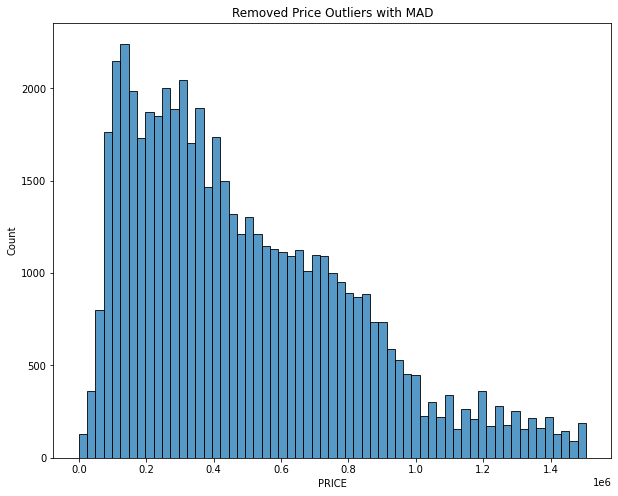

In [164]:
plt.figure(figsize=(10,8))
sns.histplot(df_res3['PRICE'])
plt.title('Removed Price Outliers with MAD')
plt.show()

In [160]:
df_res2.shape

(57900, 45)

In [159]:
df_res3.shape

(55369, 45)